# Assignment 7

#### Problem 1

One thing we didn't do in our lectures, is to plot the Fourier Transform with the appropriate x-axis. The appropriate x-axis should be in frequencies. So how should we get the frequencies? A simple guess is, just take the inverse of time, $\frac{1}{T}$, and let it be our x-axis. (Later on, when I looked at the Jupyter notebook "fft_test" in the Data Analysis folder, the first example on the sine function does mention this too! The frequency is $f=\frac{k}{N}$.)

Then we ran into another issue. the dates are in years or months for our CO2 data. Take the example of the data from "co2_mm_mlo.txt", we have a data point each month. Take the number of month, and let $1$ be divided by it, certainly makes no sense. So how about we treat time as if it is counted in months, instead of seconds, and we let the start time be 0? How do we implement this?

Here I will follow the example in "fft_test", use the data in there and modify the example to illustrate our point. 


In [2]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [3]:
import matplotlib.pyplot as plt

from fft import fft as fft
import numpy as np
import math

In [4]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

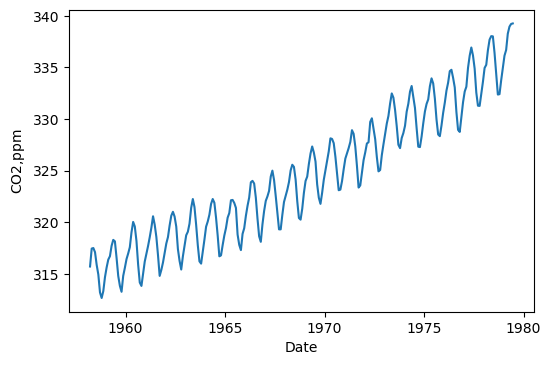

4:80: E501 line too long (86 > 79 characters)
5:80: E501 line too long (92 > 79 characters)
11:80: E501 line too long (82 > 79 characters)


In [23]:
# A python code called read_co2 is used to help us read the data from files
from read_co2 import read_co2

# read_co2.py extracts two columns, correponding to our x and y, x is number of month,
# y is the average CO2 level in that month. Inside the bracket is the name of our data file.
x, y = read_co2('co2_mm_mlo.txt')
y_valid = y >= 0.
y = y[y_valid]
x = x[y_valid]

# To use fast Fourier transform based on the Cooley–Tukey algorithm, the number of
# our data points is in powers of 2, hence we need to cut the number of data.
# We could also choose 128 or 512, they are also powers of 2.
y = y[0:256]
x = x[0:256]

# Implementing the Fourier transform on our data
Y = fft(y)
Y_abs = abs(Y)

# Plot our data first
f1 = plt.figure(1)
plt.plot(x, y)
plt.ylabel('CO${2}$,ppm')
plt.xlabel('Date')
plt.show()

Obviously our comments are a bit too long. 

Anyway, let's carry on, this is the plot of CO2 level VS month, notice we haven't plotted the Fourier transformed function yet. Because we need to get our x-axis redefined. I will first generate an array of numbers from 1 to 256. They will correspond to our actual time, sort of like 1 to 256 seconds, except here the time is counted in months, rather than seconds.

In [37]:
N = 256
T = np.arange(1, N+1)

# If we just have np.range(N), this would give us an array starting with 0.
# But we will divide 1 with this array of numbers, so 0 is no good.
# We must start with 1

In [38]:
T

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Next, I think our frequency is just $\frac{1}{T}$

In [154]:
w = 1/T

In [40]:
w

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
       0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
       0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
       0.01408451, 0.01388889, 0.01369863, 0.01351351, 0.01333

Now we plot the fourier transform VS our frequency w

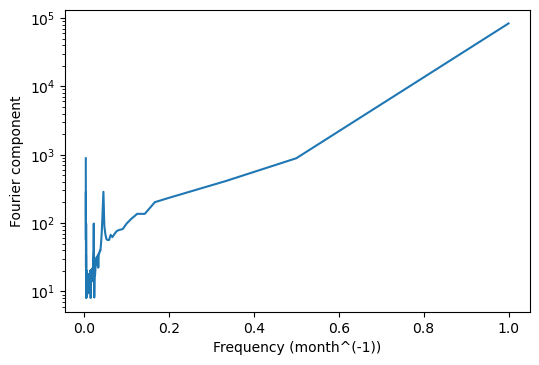

In [45]:
f2 = plt.figure(2)
plt.plot(w, Y_abs)

plt.ylabel('Fourier component')
plt.yscale('log')
plt.xlabel('Frequency (month^(-1))')


plt.show()

Now this looks more like a Fourier transform plot I think. We should zoom into the peaks at the start, I think that's where the genuine frequencies are. So we limit the range of our x-axis.

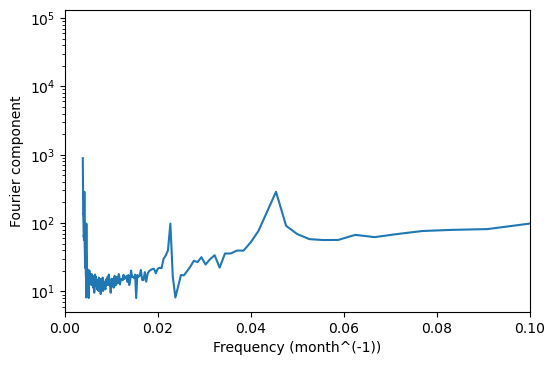

In [49]:
f3 = plt.figure(3)
plt.plot(w, Y_abs)

plt.ylabel('Fourier component')
plt.yscale('log')
plt.xlabel('Frequency (month^(-1))')
plt.xlim([0, 0.1])

plt.show()

I find that the most interesting peaks are between 0.0 to 0.1. That is why I chose this range. The first really large peak is 1/256. This peak arises because we can think of the whole data set as one oscillation, that is not an interesting feature. We should probably ignore that too.

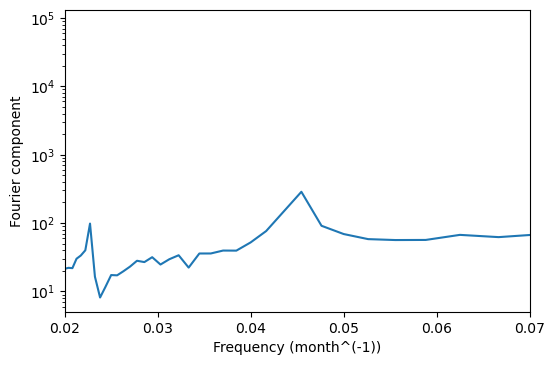

In [53]:
f4 = plt.figure(4)
plt.plot(w, Y_abs)

plt.ylabel('Fourier component')
plt.yscale('log')
plt.xlabel('Frequency (month^(-1))')
plt.xlim([0.02, 0.07])

plt.show()

The peak around the middle in the last graph, I think it actually corresponds to something! It is the yearly cycle I think, $12/256 = 0.046875$. Note that we have a logarithmic scale for the Fourier component. So the first peak is not that strong compared to the peak in the middle. So I would say that the most prominent frequency we have here is $0.046875$ per month, which correponds to the yearly oscillation. And we can see that in the first plot where we plotted the CO2 level VS real time, each bump in the curve correponds to a year.

However, there is a little uneasiness in me. If we are talking about the yearly oscillation, shouldn't the freqeuncy be 1/12 per month? But that is only true if we count one year's data I think?

On a second thought, if we take the inverse of $12/256$ and divide it by $256$, we get the frequency $1/12$. So maybe the frequency is actually given by $T/N$, where $N = 256$ is the number of data points. But the unit for $T/N$ is month, which is not the appropriate unit for frequency.

---

Next, we will do some filtering. I think I will first try filter out the higher frequencies. Here I borrowed the code from "fft_filtering.ipynb". 

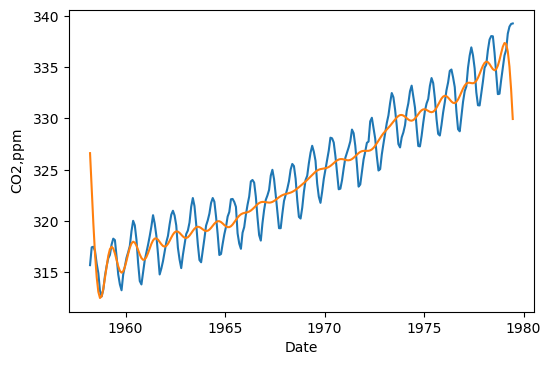

In [156]:
from fft import ifft

# Get the FFT
Y = fft(y)
# Smooth the data in the Fourier domain.
# Adjust this to change the frequencies to delete.
maxfreq = 20
Y[maxfreq:len(Y)-maxfreq] = 0.0

# Now go back to the time domain.
# Compare the data before and after filtering.
yfiltered = ifft(Y)
yfiltered_abs = abs(yfiltered)

f6 = plt.figure(6)
plt.plot(x, y, label='Original')
plt.plot(x, yfiltered_abs, label='Filtered')
plt.ylabel('CO${2}$,ppm')
plt.xlabel('Date')
plt.show()

This works. Can I modify it to filter out the lower frequencies?

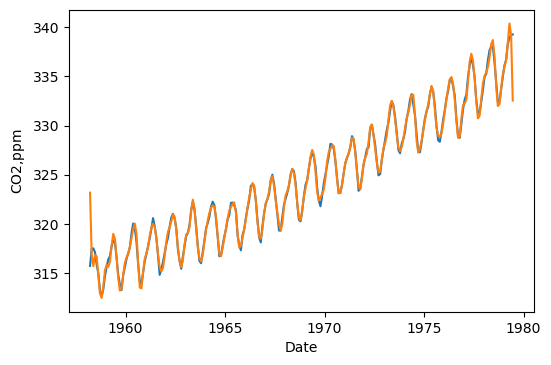

In [157]:
# Get the FFT
Y = fft(y)
# Smooth the data in the Fourier domain.
# Adjust this to change the frequencies to delete.
minfreq = 20
Y[np.abs(Y) < minfreq] = 0.0

# Now go back to the time domain.
# Compare the data before and after filtering.
yfiltered = ifft(Y)
yfiltered_abs = abs(yfiltered)

f7 = plt.figure(7)
plt.plot(x, y, label='Original')
plt.plot(x, yfiltered_abs, label='Filtered')
plt.ylabel('CO${2}$,ppm')
plt.xlabel('Date')
plt.show()

This also seems to work. Let's zoom in a little.

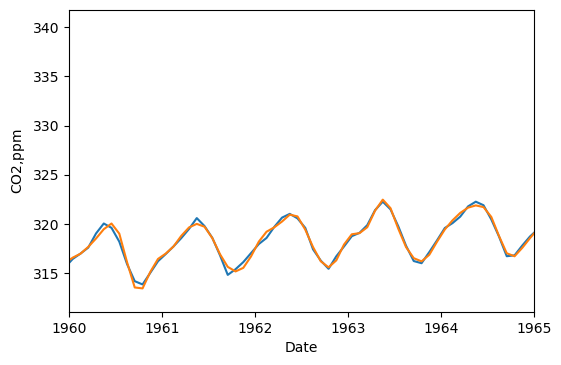

In [170]:
# Get the FFT
Y = fft(y)
# Smooth the data in the Fourier domain.
# Adjust this to change the frequencies to delete.
minfreq = 20
Y[np.abs(Y) < minfreq] = 0.0

# Now go back to the time domain.
# Compare the data before and after filtering.
yfiltered = ifft(Y)
yfiltered_abs = abs(yfiltered)

f8 = plt.figure(8)
plt.plot(x, y, label='Original')
plt.plot(x, yfiltered_abs, label='Filtered')
plt.ylabel('CO${2}$,ppm')
plt.xlabel('Date')
plt.xlim([1960, 1965])
plt.show()

So filtering makes our data smoother, but we lose some information.